In [1]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Objective 1
**To develop and evaluate machine learning models for accurate crop yield prediction in Kitui County using historical agricultural and environmental data.**

In [4]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 2. Load Dataset (assumes it's in the same folder as this notebook)
df = pd.read_csv("Kitui_Crop_Yield_Simulation.csv")


In [6]:
# 3. Encode Categorical Features
le = LabelEncoder()
df['Crop_Type_Encoded'] = le.fit_transform(df['Crop_Type'])


In [7]:
# 4. Define Features and Target
features = ['Rainfall_mm', 'Soil_Moisture', 'Temperature_C', 'Fertilizer_kg_per_ha', 'Crop_Type_Encoded']
target = 'Crop_Yield_tons_per_ha'
X = df[features]
y = df[target]


In [8]:
# 5. Split Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# 6. Train Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


In [10]:
# 7. Train XGBoost Model (light config for speed)
xgb_model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

In [11]:
# 8. Define Evaluation Function
def evaluate_model(name, y_true, y_pred):
    return {
        "Model": name,
        "R2 Score": r2_score(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred)
    }


In [12]:
# 9. Evaluate and Print Model Results
rf_results = evaluate_model("Random Forest", y_test, rf_preds)
xgb_results = evaluate_model("XGBoost", y_test, xgb_preds)

print("📊 Random Forest Results:", rf_results)
print("📊 XGBoost Results:", xgb_results)


📊 Random Forest Results: {'Model': 'Random Forest', 'R2 Score': 0.7865509802802824, 'RMSE': 0.6004055159640023, 'MAE': 0.48608599999999974}
📊 XGBoost Results: {'Model': 'XGBoost', 'R2 Score': 0.7973837563373354, 'RMSE': 0.5849715179946284, 'MAE': 0.4635401619911194}


C:\Users\brian\AppData\Local\Temp\ipykernel_23172\3161333310.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


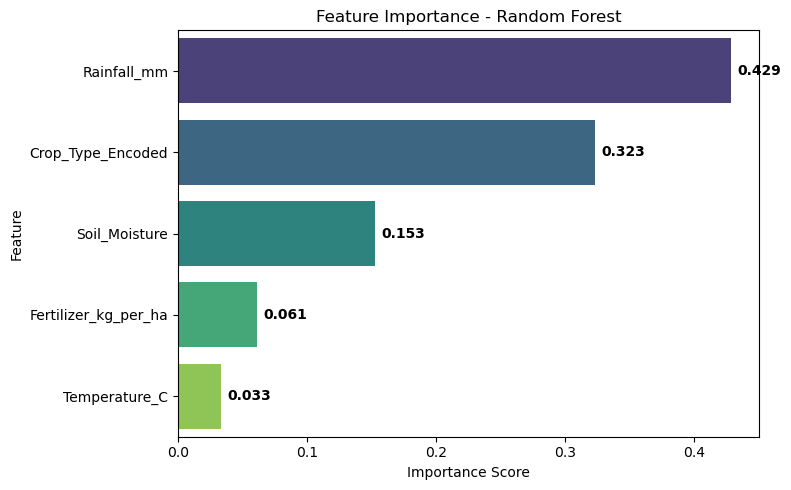

In [41]:
# 10. Feature Importance Plot (Random Forest)
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
# Add data labels to each bar
for i, v in enumerate(feat_imp.values):
    ax.text(v + 0.005, i, f"{v:.3f}", color='black', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Objective 2
**To forecast future rainfall patterns in Kitui County using time-series models and assess their implications for drought risk and agricultural planning.**


In [22]:
#Importing the necessary libraries for ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
# Step 2: Reload the dataset
df = pd.read_csv("Kitui_Crop_Yield_Simulation.csv")  # Assuming the CSV is in the same folder


In [25]:
# Step 3: Aggregate average annual rainfall
rainfall_by_year = df.groupby('Year')['Rainfall_mm'].mean().reset_index()


In [26]:
# Step 4: Create time series
rainfall_ts = rainfall_by_year.set_index('Year')['Rainfall_mm']


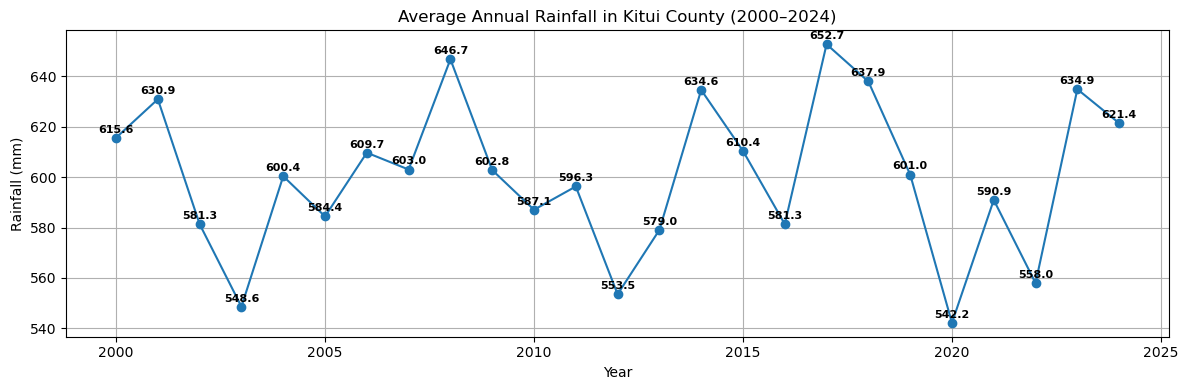

In [33]:
plt.figure(figsize=(12, 4))
plt.plot(rainfall_ts.index, rainfall_ts.values, marker='o', linestyle='-')
plt.title('Average Annual Rainfall in Kitui County (2000–2024)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.grid(True)

# Add data labels
for year, value in zip(rainfall_ts.index, rainfall_ts.values):
    plt.text(year, value + 2, f"{value:.1f}", ha='center', fontsize=8, color='black',fontweight='bold')

plt.tight_layout()
plt.show()


## Objective 3 
**Recommending Climate-Resilient Agricultural Practices Using Predictive Analytics**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Use existing feature importance from Random Forest model
importances = rf_model.feature_importances_
features = ['Rainfall_mm', 'Soil_Moisture', 'Temperature_C', 'Fertilizer_kg_per_ha', 'Crop_Type_Encoded']
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)


C:\Users\brian\AppData\Local\Temp\ipykernel_23172\1000470478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="coolwarm")


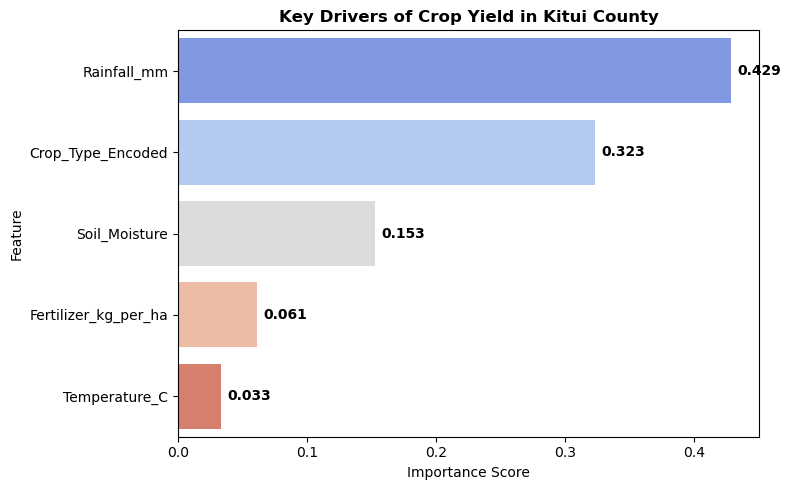

In [40]:
# Plot feature importance with bold labels
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="coolwarm")
plt.title("Key Drivers of Crop Yield in Kitui County", fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
# Add bold data labels
for i, v in enumerate(feat_imp.values):
    ax.text(v + 0.005, i, f"{v:.3f}", color='black', fontweight='bold', va='center')

plt.tight_layout()
plt.show()


In [39]:
# Print a recommendation summary based on the top 3 features
print("\n📌 Recommendation Summary Based on Feature Importance:")
top_features = feat_imp.head(3).index.tolist()

for feature in top_features:
    if feature == 'Rainfall_mm':
        print("→ Rainfall is a critical factor. Recommend adopting smart irrigation systems and rainwater harvesting.")
    elif feature == 'Soil_Moisture':
        print("→ Soil moisture is key. Promote moisture-retaining practices like mulching and drought-tolerant crops.")
    elif feature == 'Temperature_C':
        print("→ Temperature affects yield. Consider shade nets or crop timing strategies.")
    elif feature == 'Fertilizer_kg_per_ha':
        print("→ Fertilizer use matters. Recommend precision agriculture and soil testing for optimal input use.")
    elif feature == 'Crop_Type_Encoded':
        print("→ Crop selection is impactful. Promote climate-resilient crops like pigeon peas and sorghum.")



📌 Recommendation Summary Based on Feature Importance:
→ Rainfall is a critical factor. Recommend adopting smart irrigation systems and rainwater harvesting.
→ Crop selection is impactful. Promote climate-resilient crops like pigeon peas and sorghum.
→ Soil moisture is key. Promote moisture-retaining practices like mulching and drought-tolerant crops.
